In [106]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [107]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [108]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (5 Points)

salary_count = data.groupby(['MaritalDesc', 'Sex'])['Salary'].agg(['min', 'median', 'max', 'mean'])
salary_count = salary_count.rename(columns={'min': 'min_salary', 'median': 'median_salary', 'max': 'max_salary', 'mean': 'average_salary'})
salary_count.head(10)

min_salary  median_salary  max_salary  average_salary
MaritalDesc Sex                                                       
Divorced    F         45069        59393.0       68182    57345.500000
            M         45115        63738.5      148999    72520.857143
Married     F         45433        62662.0      250000    69638.986111
            M         46120        63370.5      157000    70089.038462
Separated   F         52984        60627.0       66149    60658.888889
            M         64397        70468.0       74417    69760.666667
Single      F         45395        62068.0      220450    68988.266667
            M         46428        63055.5      178000    71340.048387
Widowed     F         45046        63303.5      107226    69719.750000
            M         52788        61359.0       67176    60670.500000

2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [109]:
#code here
termination_reasons = data.groupby('TermReason').size().reset_index(name='total_termination')
termination_reasons = termination_reasons.sort_values('total_termination', ascending=False)
termination_reasons = termination_reasons.set_index('TermReason')
termination_reasons.head(5)

,total_termination
TermReason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [110]:
#code here
exceeds_performance = data[data['PerformanceScore'] == 'Exceeds']
recruitment_counts = exceeds_performance.groupby('RecruitmentSource').size().reset_index(name='total_recruit')
recruitment_counts = recruitment_counts.sort_values('total_recruit', ascending=False)
recruitment_counts = recruitment_counts.set_index('RecruitmentSource')
recruitment_counts.head(7)

,total_recruit
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [111]:
#code here
managers_department = data.groupby('Department')['ManagerName'].nunique().reset_index(name='ManagerName')
managers_department = managers_department.set_index('Department')
managers_department.head(6)

,ManagerName
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [112]:
#code here
termination_ratio = data.groupby('Sex')['Termd'].value_counts(normalize=True)
termination_ratio.head(4)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64

# Create an EDA and Data Visualization Question

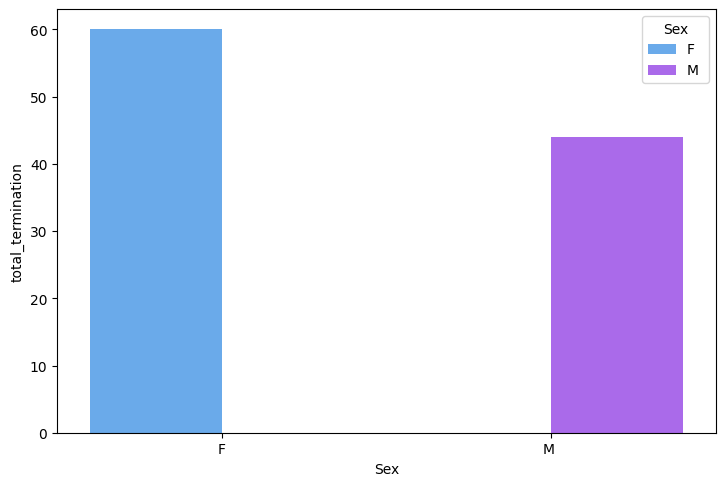

In [113]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(8.5, 5.5))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

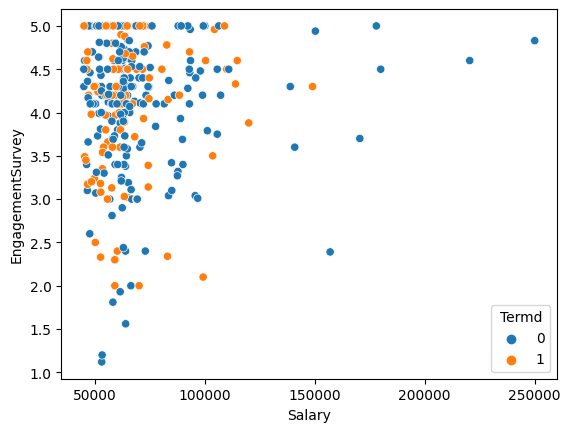

In [114]:
#code here
sns.scatterplot(data=data, x='Salary', y='EngagementSurvey', hue='Termd')
plt.xlabel('Salary')
plt.ylabel('EngagementSurvey')
plt.show()

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

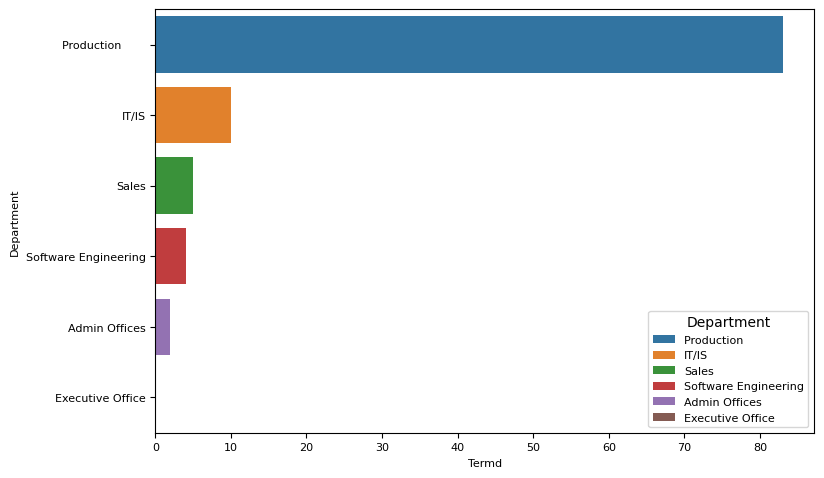

In [117]:
term = data.groupby('Department')['Termd'].sum().reset_index()
sort = term.sort_values('Termd', ascending=False)

f, ax = plt.subplots(1, 1, figsize=(8.5, 5.5))
ax = sns.barplot(x='Termd', y='Department', data=sort, hue='Department', dodge=False)


plt.xlabel('Termd', fontsize=8)
plt.ylabel('Department', fontsize=8)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(title='Department',fontsize=8)

plt.show()

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

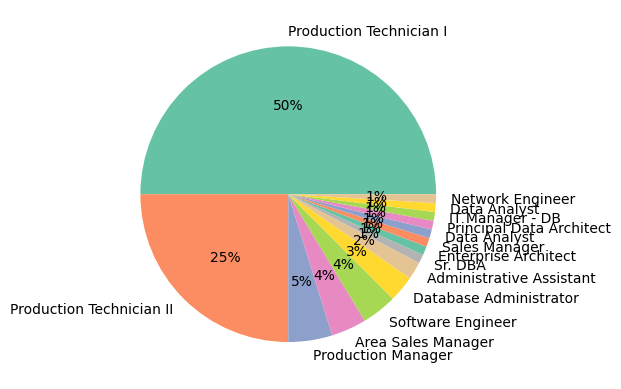

In [118]:
terminated_data = data[data['Termd'] == 1]
position_counts = terminated_data['Position'].value_counts()
colors = plt.cm.Set2.colors
plt.pie(position_counts, labels=position_counts.index, autopct='%1.0f%%', colors=colors)
plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

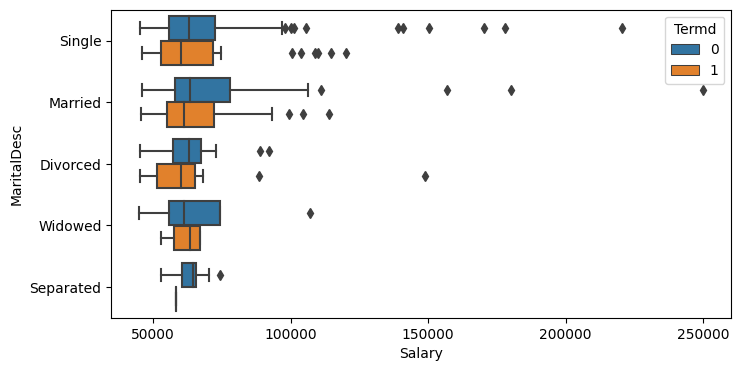

In [119]:
#code here
plt.figure(figsize=(8, 4))
sns.boxplot(x='Salary', y='MaritalDesc', hue='Termd', data=data)
plt.xlabel('Salary')
plt.ylabel('MaritalDesc')
plt.show()

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

Pairplot


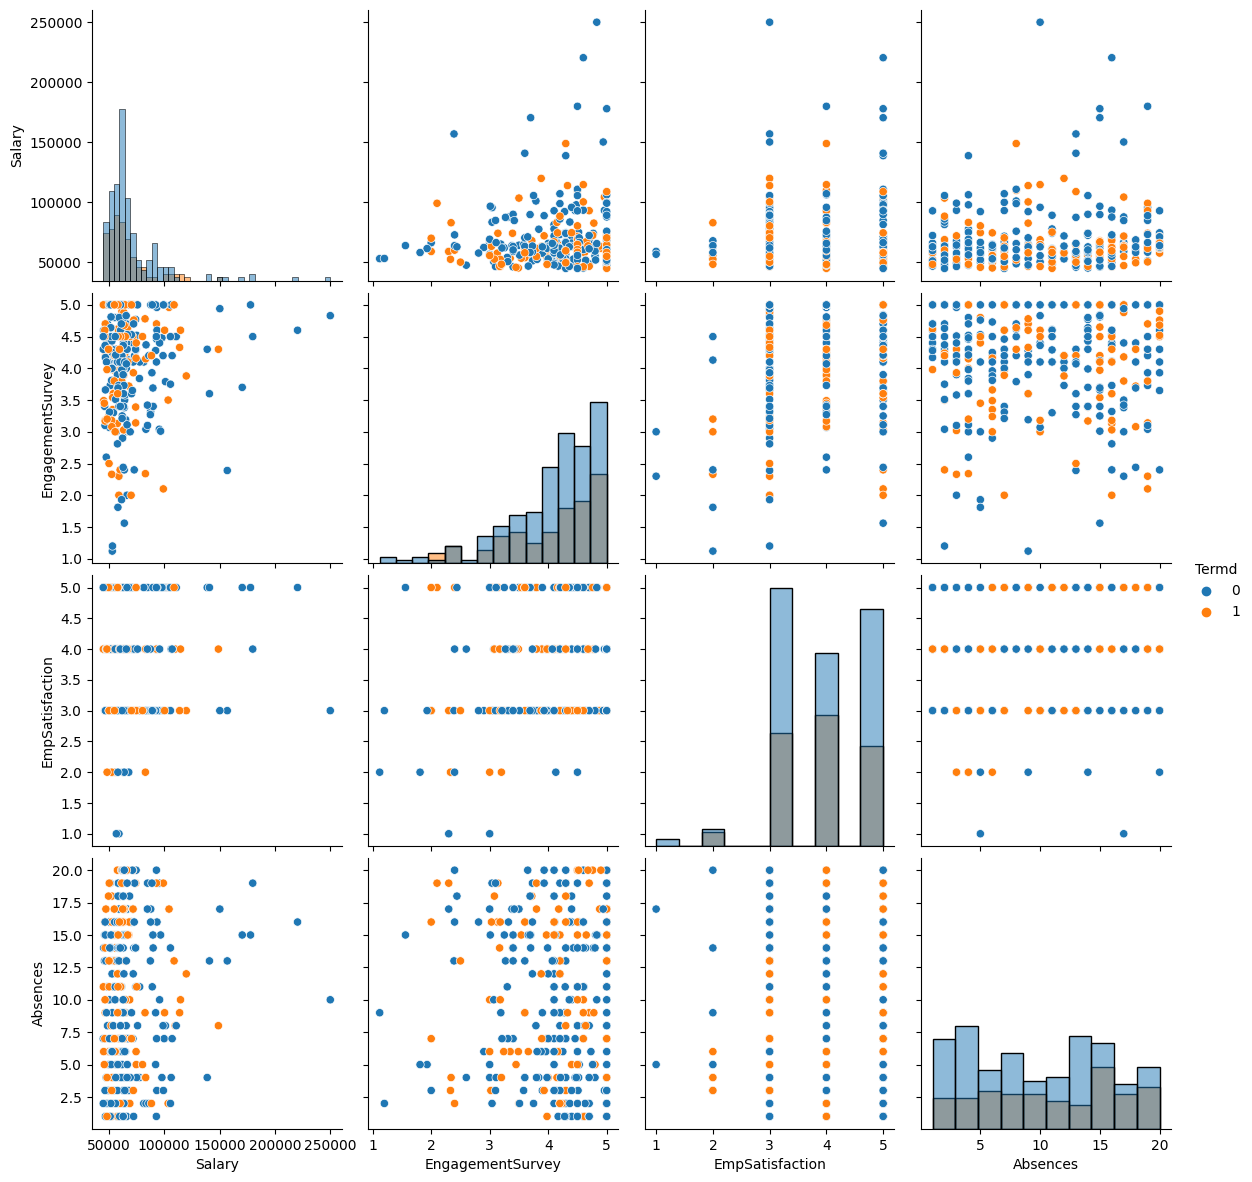

In [120]:
#codde here
print('Pairplot')
sns.pairplot(data=data[['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences', 'Termd']], hue='Termd', height=3, diag_kind="hist")
plt.show()

# Create Machine Learning Model to Predict Termd and Question

In [121]:
#11. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
#(5 points)

data['DOB_date'] = pd.to_datetime(data['DOB'], format='%m/%d/%y')
data['Age'] = 2022 - data['DOB_date'].dt.year
data[['DOB', 'DOB_date', 'Age']]

,DOB,DOB_date,Age
0,07/10/83,1983-07-10,39
1,05/05/75,1975-05-05,47
2,09/19/88,1988-09-19,34
3,09/27/88,1988-09-27,34
4,09/08/89,1989-09-08,33
...,...,...,...
306,05/11/85,1985-05-11,37
307,05/04/82,1982-05-04,40
308,08/30/79,1979-08-30,43
309,02/24/79,1979-02-24,43


In [122]:
#12. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Salary_minmax'] = scaler.fit_transform(data[['Salary']])
data[['Salary', 'Salary_minmax']]

,Salary,Salary_minmax
0,62506,0.085190
1,104437,0.289777
2,64955,0.097139
3,64991,0.097315
4,50825,0.028197
...,...,...
306,65893,0.101716
307,48513,0.016916
308,220450,0.855821
309,89292,0.215883


In [123]:
#13. Ubahlah semua tipe data object menjadi category
# 5 point
print(data.dtypes)

Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                                   object
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                            object
DateofTerm

In [124]:
#Setelah diubah category
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category')
print(data.dtypes)

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [125]:
#14. Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
# 5 point
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['RecruitmentSource'] = label_encoder.fit_transform(data['RecruitmentSource'])

#15. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point
data['PerformanceScore'] = label_encoder.fit_transform(data['PerformanceScore'])
data.dtypes


Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [126]:
#16. Pisahkan dependent variable dan independent variable
# 5 point

#Dependent Variable (Target)
y = data['Termd']
y.head(5)

#Independent Variable (Feature)
x = data
x.drop(['Termd'], axis=1)
x['DOB_Date']=pd.to_datetime(x['DOB'])
x['Age'] = 2022 - x['DOB_Date'].dt.year
Salary = x['Salary'].to_numpy()
salary = Salary.reshape(-1,1)
scaler = MinMaxScaler()
hasil_scale = scaler.fit_transform(salary)
x['Salary_minmax']=hasil_scale
x = x[['MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID', 'PositionID', 'Age', 'RecruitmentSource', 'PerformanceScore', 'Salary_minmax', 'Absences', 'SpecialProjectsCount', 'EmpSatisfaction', 'EngagementSurvey']]
x.head(5)

,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,PositionID,Age,RecruitmentSource,PerformanceScore,Salary_minmax,Absences,SpecialProjectsCount,EmpSatisfaction,EngagementSurvey
0,0,0,1,5,4,19,39,5,0,0.085190,1,0,5,4.60
1,1,1,1,3,3,27,47,4,1,0.289777,17,6,3,4.96
2,1,1,0,5,3,20,34,5,1,0.097139,3,0,3,3.02
3,1,1,0,5,3,19,34,4,1,0.097315,15,0,5,4.84
4,0,2,0,5,3,19,33,3,1,0.028197,2,0,4,5.00


In [127]:
#17. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=35)

In [128]:
#18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(tol=0.00001, C=1, max_iter=1000, penalty = None)
train_model = model.fit(x_train, y_train)

y_pred = train_model.predict(x_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print("Accuracy : %.2f%%" % (accuracy * 100.0))
print("Precision : %.2f%%" % (precision* 100.0))
print("Recall : %.2f%%" % (recall * 100.0))


Accuracy : 61.90%
Precision : 41.67%
Recall : 22.73%


# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>

No. 19

In [139]:
temp19 = data[data['PerformanceScore'] != 'PIP']
temp19 = temp19[temp19['PerformanceScore'] != 'Needs Improvement']
temp19a = temp19.groupby(['ManagerName',
                          'PerformanceScore'])['Employee_Name'].agg(
    total = 'count').sort_values(by = 'total',
                                 ascending = False)


In [138]:
data['PerformanceScore'].value_counts()

1    243
0     37
2     18
3     13
Name: PerformanceScore, dtype: int64

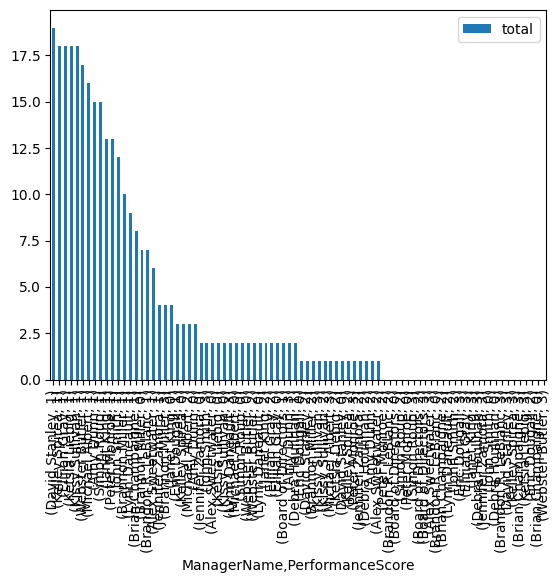

In [140]:
temp19a.plot(kind = "bar")
plt.show()

Analisis: Menurut analisis saya, Manager memiliki peran dalam menentukan performance karyawan.

No. 20

In [149]:
recruit = np.array(data['RecruitmentSource'].value_counts().sort_values(ascending = False).keys())
totalRecruit = np.array(data['RecruitmentSource'].value_counts())
isNotTerm = []
isTerm = []

for i in range(len(recruit)):
    for j in range(2):
        temp20 = data[data['RecruitmentSource'] == recruit[i]][['RecruitmentSource', 'Termd']]
        temp20 = temp20[temp20['Termd'] == j]

        if j == 0:
            isNotTerm.append(temp20.count()[0])
        elif j == 1:
            isTerm.append(temp20.count()[0])

termRate = []

for i in range(len(recruit)):
    temp20b = isTerm[i] / totalRecruit[i]
    temp20b *= 100
    termRate.append(round(temp20b, 2))
dfTermRate = pd.DataFrame({'RecruitmentSource': recruit,
                           'TermRate (in %)': termRate})
dfTermRate.sort_values(by = 'TermRate (in %)')

,RecruitmentSource,TermRate (in %)
6,8,7.69
3,2,16.13
1,5,23.68
0,4,24.14
5,0,47.83
7,7,50.00
4,1,55.17
2,3,61.22
8,6,100.00


Analisis = Terminated rate yang paling rendah ada di recruitment source 8. Recruitment source 8 adalah website.